<p align="center">
<img src = "https://github.com/HarryVargas96/Wine-quality/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "80%">  </img>

# **Taller: Introducción al análisis de datos y modelamiento con Python**

## **¿Qué es Data Science?**

Es un campo de estudio que busca extraer conocimiento a partir de los datos. Combina las matemáticas, el método científico y la estadística. 

Involucra:
* Análisis de datos
* Aprendizaje de máquinas
* Big Data


<p align="center">
<img src = "https://raw.githubusercontent.com/HarryVargas96/ICFES/main/Venn%20Diagram%20Data%20Science.png" alt = "Encabezado" width = "40%">  </img>

## **Metodología CRISP-DM**

Es una metodología de trabajo creada para orientar procesos de minería de datos. Su nombre es dado por las siglas en inglés.

**CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining




<p align="center">
<img src = "https://raw.githubusercontent.com/HarryVargas96/ICFES/main/CRISPDM.jpg" alt = "Encabezado" width = "40%">  </img>

## **Carga de las librerías necesarias**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

## **Carga del Dataset**

Resultados prueba  ICFES Saber 11 2020 Calendario A

In [46]:
# Cargamos los datos desde un repositorio en GitHub

icfes = pd.read_csv('https://github.com/HarryVargas96/ICFES/blob/main/icfes_2020_reducido.csv?raw=true')
print(icfes.shape)

(100974, 15)


In [47]:
type(icfes)

pandas.core.frame.DataFrame

In [48]:
icfes

,Unnamed: 0,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100969,63939,M,01/10/2002,No,BOGOTÁ,Estrato 2,Educación profesional completa,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,320,NO
100970,5659,M,28/08/2003,Si,SAN ANDRES,Estrato 3,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,263,GENERACION E - GRATUIDAD
100971,270611,M,21/05/2003,No,BOGOTÁ,Estrato 3,No sabe,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,244,NO
100972,358241,F,15/03/2002,No,ATLANTICO,Estrato 6,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,215,NO


## **Entendimiento del negocio**

El ICFES Saber 11 es una prueba aplicada a estudiantes próximos a graduarse de undécimo grado, último grado de bachillerato en Colombia. El objetivo de la prueba es medir el nivel de desarrollo de conocimientos de los estudiantes en 4 áreas:

* Matemáticas
* Lectura crítica
* Sociales y Ciudadadanas
* Ciencias Naturales
* Inglés


https://www.icfes.gov.co/documents/20143/1527838/Infografia+reporte+de+resultados+por+estudiante+de+Saber-11.pdf

**Objetivos de la aplicación prueba**

1. Evaluar el desempeño de los estudiantes
2. Brindar datos relevantes a las instituciones educativas de educación superior
3. Monitorear la calidad de la educación en instituciones de educación media.


**Objetivos del análisis**

1. Describir la muestra
2. Entender las relaciones entre las variables predictoras y el puntaje global
3. Construir un modelo de clasificación que permita predecir el desempeño de un estudiante dadas ciertas condiciones socioeconómicas

In [49]:
icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100974 entries, 0 to 100973
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            100974 non-null  int64 
 1   ESTU_GENERO           100972 non-null  object
 2   ESTU_FECHANACIMIENTO  100974 non-null  object
 3   ESTU_TIENEETNIA       100363 non-null  object
 4   ESTU_DEPTO_RESIDE     100974 non-null  object
 5   FAMI_ESTRATOVIVIENDA  97576 non-null   object
 6   FAMI_EDUCACIONPADRE   98373 non-null   object
 7   FAMI_EDUCACIONMADRE   98267 non-null   object
 8   FAMI_TIENEINTERNET    98274 non-null   object
 9   FAMI_TIENECOMPUTADOR  96928 non-null   object
 10  COLE_NATURALEZA       100974 non-null  object
 11  COLE_AREA_UBICACION   100974 non-null  object
 12  COLE_JORNADA          100974 non-null  object
 13  PUNT_GLOBAL           100974 non-null  int64 
 14  ESTU_GENERACION-E     100974 non-null  object
dtypes: int64(2), obje

In [50]:
# Valores faltantes

icfes.isna().sum()

Unnamed: 0                 0
ESTU_GENERO                2
ESTU_FECHANACIMIENTO       0
ESTU_TIENEETNIA          611
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA    3398
FAMI_EDUCACIONPADRE     2601
FAMI_EDUCACIONMADRE     2707
FAMI_TIENEINTERNET      2700
FAMI_TIENECOMPUTADOR    4046
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
dtype: int64

## **Entendimiento de los datos**

* Describir mis datos usando estadística descriptiva y visualizaciones.
* Entender las relaciones presentes entre las variables de estudio.
* Identificar errores o valores atípicos.

### Variable Objetivo - Puntaje Global

$ Loca_4 $

In [51]:
puntaje = icfes['PUNT_GLOBAL']

print(puntaje.mean())
print(puntaje.std())

248.4459860954305
48.74151073579994


In [52]:
puntaje.max()

500

In [53]:
np.percentile(puntaje,99.9)

410.0

In [54]:
icfes.loc[icfes['PUNT_GLOBAL'] < 211].count()

Unnamed: 0              24850
ESTU_GENERO             24850
ESTU_FECHANACIMIENTO    24850
ESTU_TIENEETNIA         24682
ESTU_DEPTO_RESIDE       24850
FAMI_ESTRATOVIVIENDA    23697
FAMI_EDUCACIONPADRE     24054
FAMI_EDUCACIONMADRE     23991
FAMI_TIENEINTERNET      23946
FAMI_TIENECOMPUTADOR    23528
COLE_NATURALEZA         24850
COLE_AREA_UBICACION     24850
COLE_JORNADA            24850
PUNT_GLOBAL             24850
ESTU_GENERACION-E       24850
dtype: int64

In [55]:
icfes.describe()

,Unnamed: 0,PUNT_GLOBAL
count,100974.000000,100974.000000
mean,252481.857983,248.445986
std,145788.076596,48.741511
min,4.000000,0.000000
25%,126054.500000,211.000000
50%,252170.500000,245.000000
75%,379022.750000,282.000000
max,504868.000000,500.000000


Ahora algo de visualización

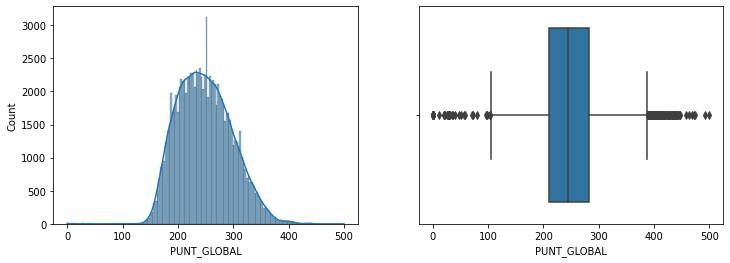

In [56]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

sb.histplot(data=icfes, x = 'PUNT_GLOBAL', kde=True, ax = axes[0])
sb.boxplot(data=icfes, x = 'PUNT_GLOBAL', ax = axes[1])

Género del estudiante

In [57]:
icfes['ESTU_GENERO'].value_counts()

F    55368
M    45604
Name: ESTU_GENERO, dtype: int64

In [58]:
icfes.groupby('ESTU_GENERO')['PUNT_GLOBAL'].mean()

ESTU_GENERO
F    245.308391
M    252.254978
Name: PUNT_GLOBAL, dtype: float64

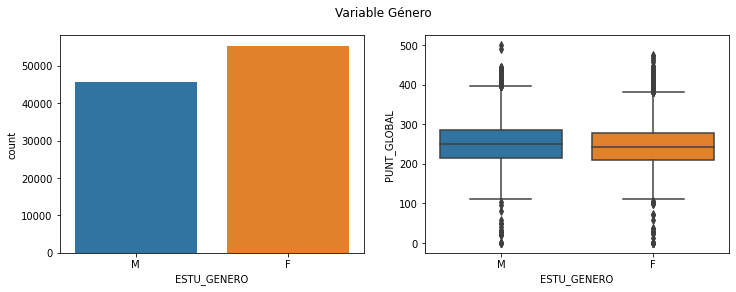

In [59]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

fig.suptitle('Variable Género')
sb.countplot(ax = axes[0], data = icfes, x = 'ESTU_GENERO')
sb.boxplot(ax = axes[1], data = icfes, x = 'ESTU_GENERO', y = 'PUNT_GLOBAL')

Departamento de residencia

In [60]:
icfes['ESTU_DEPTO_RESIDE'].unique()

array(['CUNDINAMARCA', 'VALLE', 'NARIÑO', 'BOGOTÁ', 'ANTIOQUIA',
       'SANTANDER', 'HUILA', 'ATLANTICO', 'CORDOBA', 'CAUCA', 'META',
       'NORTE SANTANDER', 'SUCRE', 'BOLIVAR', 'QUINDIO', 'CASANARE',
       'BOYACA', 'MAGDALENA', 'LA GUAJIRA', 'CALDAS', 'ARAUCA',
       'RISARALDA', 'TOLIMA', 'CESAR', 'PUTUMAYO', 'GUAVIARE', 'VICHADA',
       'CAQUETA', 'CHOCO', 'AMAZONAS', 'SAN ANDRES', 'GUAINIA', 'VAUPES',
       'EXTRANJERO'], dtype=object)

Text(0, 0.5, 'Departamento de residencia')

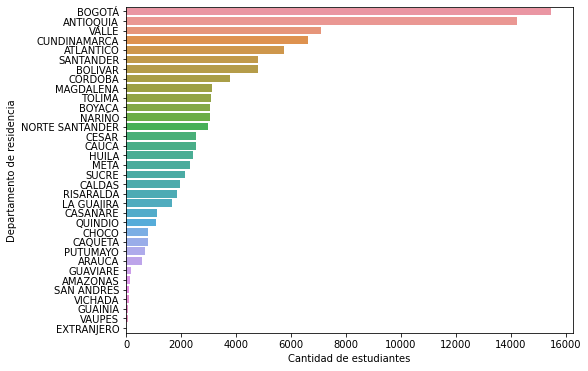

In [61]:
fig = plt.figure(figsize=(8,6))
sb.countplot(data = icfes, y = 'ESTU_DEPTO_RESIDE',order= icfes['ESTU_DEPTO_RESIDE'].value_counts().index)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel('Departamento de residencia')

Estudiantes con Etnia

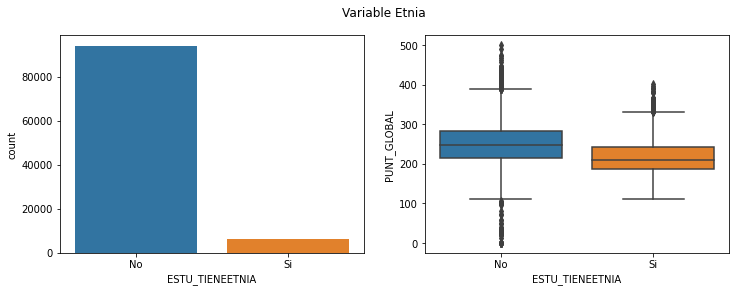

In [62]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

fig.suptitle('Variable Etnia')
sb.countplot(ax = axes[0], data = icfes, x = 'ESTU_TIENEETNIA')
sb.boxplot(ax = axes[1], data = icfes, x = 'ESTU_TIENEETNIA', y = 'PUNT_GLOBAL')

Colegio

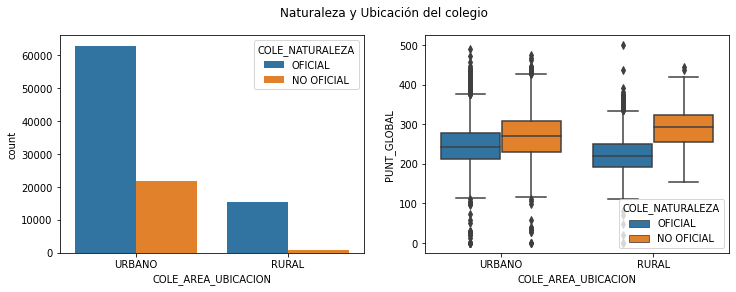

In [63]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

fig.suptitle('Naturaleza y Ubicación del colegio')

sb.countplot(ax = axes[0],data = icfes, x ='COLE_AREA_UBICACION', hue = 'COLE_NATURALEZA' )
sb.boxplot(ax = axes[1], data = icfes, x = 'COLE_AREA_UBICACION', y = 'PUNT_GLOBAL', hue = 'COLE_NATURALEZA' )


Educación de la madre

## **Preparación: Transformación y limpieza**

* Crear una nueva variable
* Seleccionar variables para modelado
* Detectar y corregir errores, valores faltantes, datos atípicos
* Transformar variables predictoras
* Transformar variable objetivo - discretizar

Creación de la variable Edad

In [64]:
from datetime import datetime

# Modulo que permite trabajar con fechas
# strptime es un método que permite convertir un string a fecha de acuerdo a un formato

def edad(x):
    birth = datetime.strptime(x, '%d/%m/%Y') # Fecha nacimiento
    prueba = datetime.strptime('09/08/2020', '%d/%m/%Y') #Fecha presentación examen
    return prueba.year - birth.year # Edad el día de presentación del examen


In [65]:
%time icfes['ESTU_EDAD'] = icfes['ESTU_FECHANACIMIENTO'].apply(lambda x: edad(x))

CPU times: user 1.94 s, sys: 1.42 ms, total: 1.95 s
Wall time: 1.96 s


In [66]:
# %time icfes['ESTU_EDAD'] = icfes.apply(lambda x: edad(x['ESTU_FECHANACIMIENTO']),axis = 1)

In [67]:
icfes.describe()

,Unnamed: 0,PUNT_GLOBAL,ESTU_EDAD
count,100974.000000,100974.000000,100974.000000
mean,252481.857983,248.445986,17.635966
std,145788.076596,48.741511,9.357959
min,4.000000,0.000000,0.000000
25%,126054.500000,211.000000,17.000000
50%,252170.500000,245.000000,17.000000
75%,379022.750000,282.000000,18.000000
max,504868.000000,500.000000,2018.000000


Inspección de los datos atípicos

In [68]:
icfes.loc[icfes['ESTU_EDAD'] < 12,['ESTU_EDAD','ESTU_FECHANACIMIENTO']]

,ESTU_EDAD,ESTU_FECHANACIMIENTO
1234,7,13/03/2013
2082,11,05/08/2009
2423,0,13/07/2020
3139,0,03/09/2020
3804,9,21/06/2011
5894,7,19/02/2013
11406,9,22/06/2011
12306,0,17/03/2020
13564,6,03/05/2014
16923,11,09/04/2009


Filtrar para eliminar datos atípicos

In [69]:
# Creamos una copia icfes2, eliminamos edades menores a 14 y superiores a 81

icfes2 = icfes.loc[(icfes['ESTU_EDAD'] >= 14) & (icfes['ESTU_EDAD'] < 81)]

In [70]:
icfes2.describe()

,Unnamed: 0,PUNT_GLOBAL,ESTU_EDAD
count,100911.000000,100911.000000,100911.000000
mean,252488.344868,248.444362,17.601619
std,145791.145071,48.741126,2.859072
min,4.000000,0.000000,14.000000
25%,126062.500000,211.000000,17.000000
50%,252172.000000,245.000000,17.000000
75%,379030.000000,282.000000,18.000000
max,504868.000000,500.000000,74.000000


Inspección visual de la nueva variable edad

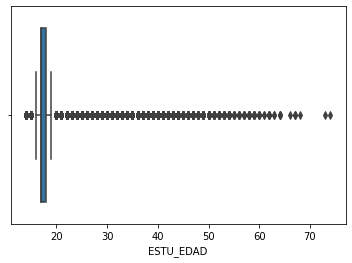

In [71]:
sb.boxplot(data = icfes2 , x = 'ESTU_EDAD')

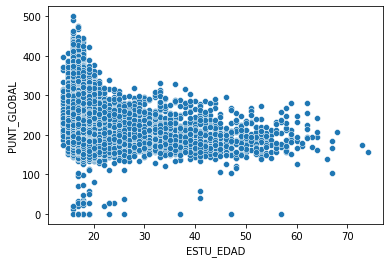

In [72]:
sb.scatterplot(data = icfes2, x = 'ESTU_EDAD', y = 'PUNT_GLOBAL')

Valores faltantes

In [73]:
icfes.isnull().sum()

Unnamed: 0                 0
ESTU_GENERO                2
ESTU_FECHANACIMIENTO       0
ESTU_TIENEETNIA          611
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA    3398
FAMI_EDUCACIONPADRE     2601
FAMI_EDUCACIONMADRE     2707
FAMI_TIENEINTERNET      2700
FAMI_TIENECOMPUTADOR    4046
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
ESTU_EDAD                  0
dtype: int64

In [74]:
icfes2.dropna(axis = 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
icfes2.shape

(94860, 16)

Selección de características

In [76]:
# Eliminar variable untitled en posición 0

icfes2 = icfes2.drop(columns = 'Unnamed: 0')

In [77]:
# Eliminar 3 variables que no son necesarias en el análisis

icfes2 = icfes2.drop(columns=['ESTU_GENERACION-E','ESTU_FECHANACIMIENTO','ESTU_DEPTO_RESIDE'])
icfes2.shape

(94860, 12)

In [78]:
icfes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94860 entries, 0 to 100973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ESTU_GENERO           94860 non-null  object
 1   ESTU_TIENEETNIA       94860 non-null  object
 2   FAMI_ESTRATOVIVIENDA  94860 non-null  object
 3   FAMI_EDUCACIONPADRE   94860 non-null  object
 4   FAMI_EDUCACIONMADRE   94860 non-null  object
 5   FAMI_TIENEINTERNET    94860 non-null  object
 6   FAMI_TIENECOMPUTADOR  94860 non-null  object
 7   COLE_NATURALEZA       94860 non-null  object
 8   COLE_AREA_UBICACION   94860 non-null  object
 9   COLE_JORNADA          94860 non-null  object
 10  PUNT_GLOBAL           94860 non-null  int64 
 11  ESTU_EDAD             94860 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 9.4+ MB


Transformación de variables categóricas - Variables Dummy

In [87]:
# oNE hOT CODING

icfes_final = pd.get_dummies(icfes2)
icfes_final

,PUNT_GLOBAL,ESTU_EDAD,ESTU_GENERO_F,ESTU_GENERO_M,ESTU_TIENEETNIA_No,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,COLE_NATURALEZA_NO OFICIAL,COLE_NATURALEZA_OFICIAL,COLE_AREA_UBICACION_RURAL,COLE_AREA_UBICACION_URBANO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA
0,267,18,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
1,282,15,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
2,226,18,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0
3,237,19,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
4,229,18,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100969,320,18,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0
100970,263,17,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0
100971,244,17,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0
100972,215,18,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0


In [80]:
icfes_final.drop(columns=['ESTU_GENERO_M','ESTU_TIENEETNIA_No','FAMI_TIENEINTERNET_No','FAMI_TIENECOMPUTADOR_No','COLE_NATURALEZA_NO OFICIAL','COLE_AREA_UBICACION_RURAL'],inplace=True)


In [81]:
icfes_final

,PUNT_GLOBAL,ESTU_EDAD,ESTU_GENERO_F,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENEINTERNET_Si,FAMI_TIENECOMPUTADOR_Si,COLE_NATURALEZA_OFICIAL,COLE_AREA_UBICACION_URBANO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA
0,267,18,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0
1,282,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0
2,226,18,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0
3,237,19,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0
4,229,18,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100969,320,18,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0
100970,263,17,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
100971,244,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0
100972,215,18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0


In [82]:
icfes_final.shape

(94860, 45)

Declaramos X, y. Variables predictoras y variables a predecir

In [88]:
X = icfes_final.drop(columns= 'PUNT_GLOBAL')
y = icfes_final[['PUNT_GLOBAL']]

Transformación de variable objetivo, discretización

In [89]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy = 'quantile')
y = discretizer.fit_transform(y)


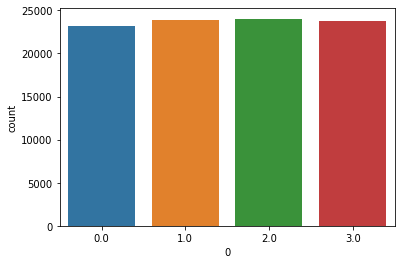

In [90]:
sb.countplot(x = pd.DataFrame(y).iloc[:,0])


## **Modelamiento**

In [91]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)

clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

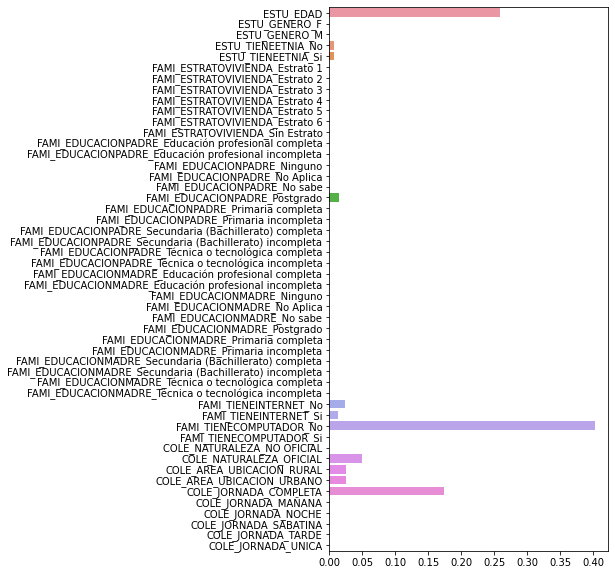

In [92]:
variables = X.columns
importancia = clf.feature_importances_

fig = plt.figure(figsize=(5,10))
sb.barplot(y = variables,x = importancia)

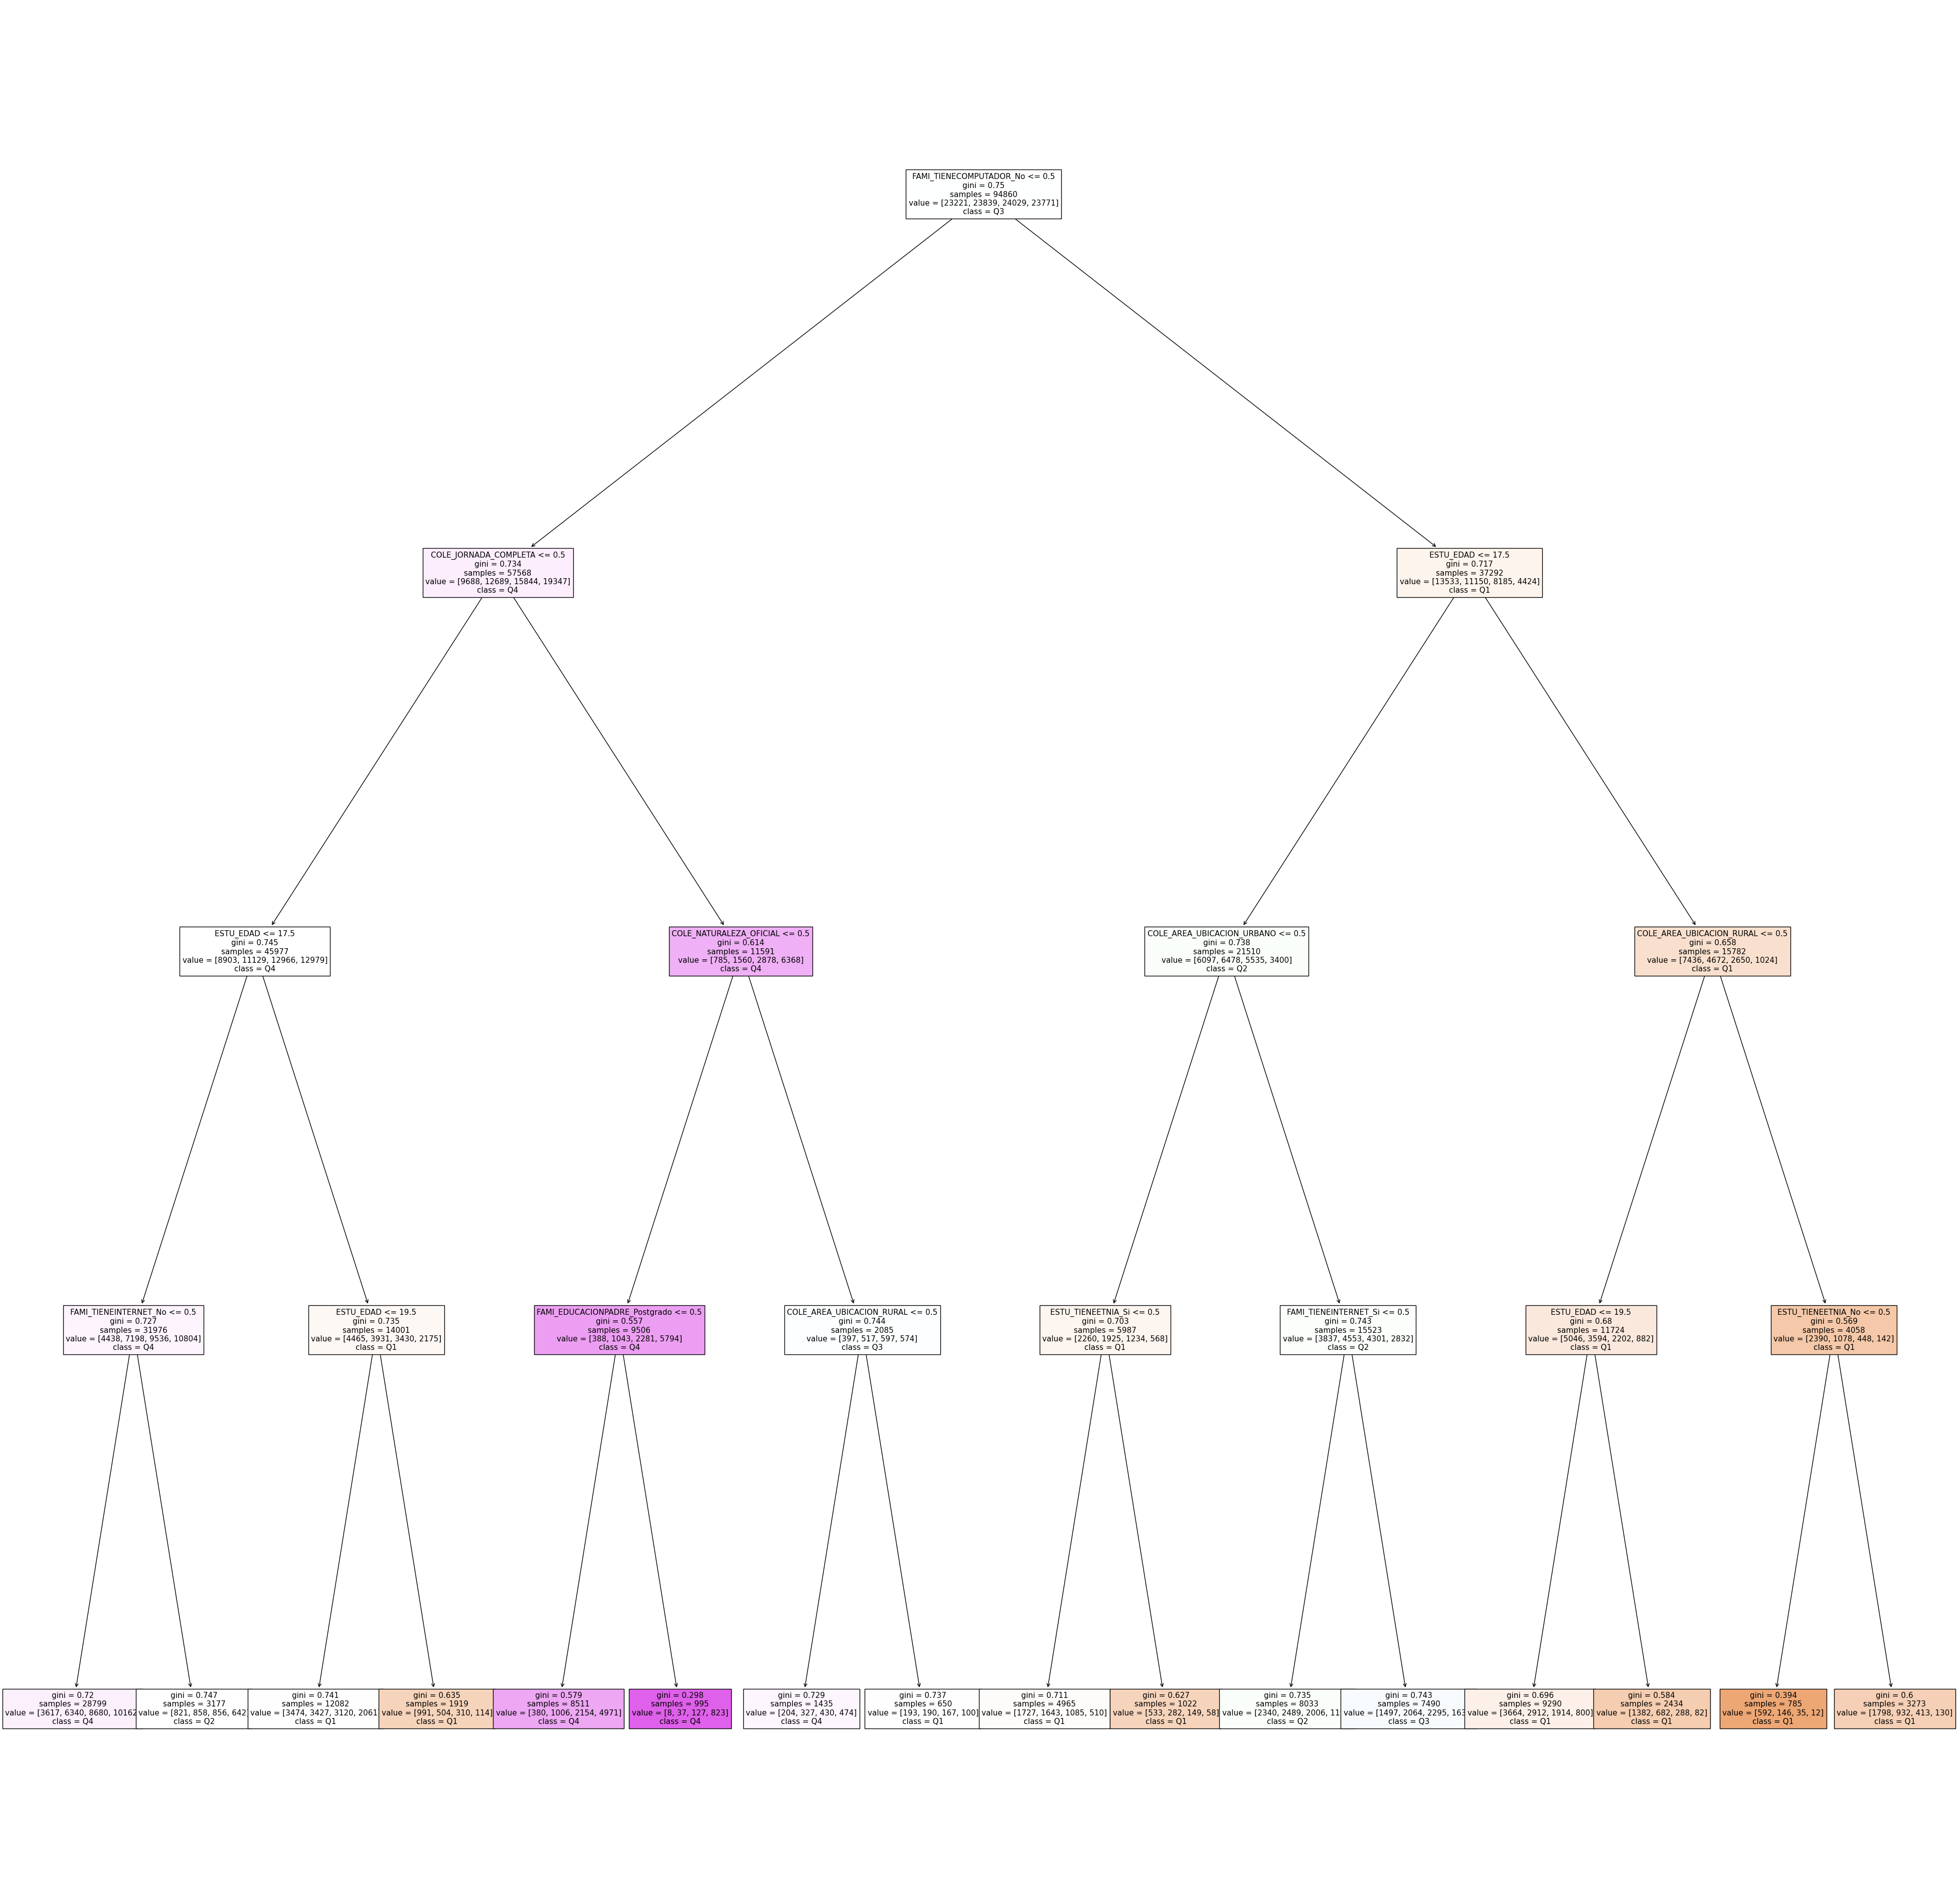

In [93]:
from sklearn import tree

text = tree.export_text(clf)

with open("decision_tree.log", "w") as fout:
    fout.write(text)

fig = plt.figure(figsize=(50,50), dpi= 100)
_ = tree.plot_tree(clf, 
                   feature_names= X.columns, 
                   class_names = ['Q1','Q2','Q3','Q4'],
                   filled=True,
                   fontsize = 11)

fig.savefig("decision_tree.png")

## Y ahora .... **¿Qué más podemos hacer?**

* Aumentar la complejidad del módelo 
* Transformar nuestros datos de una forma diferente
* Usar más predictores
* Abordar el problema como una regresión
* Usar otros algoritmos
* Usar Validación Cruzada
* Optimizar hiperparámetros - GridSearch - RandomSearch

* Casos hipotéticos

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*

*Octubre - 2021*